,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5270
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0770
ridge,Ridge Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0800
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2900
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0510
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1350
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0500
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1940
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0950
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4130


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

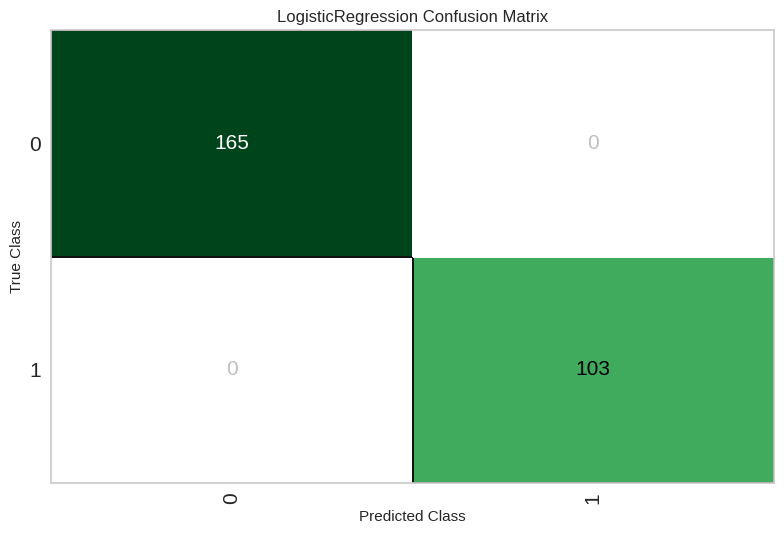

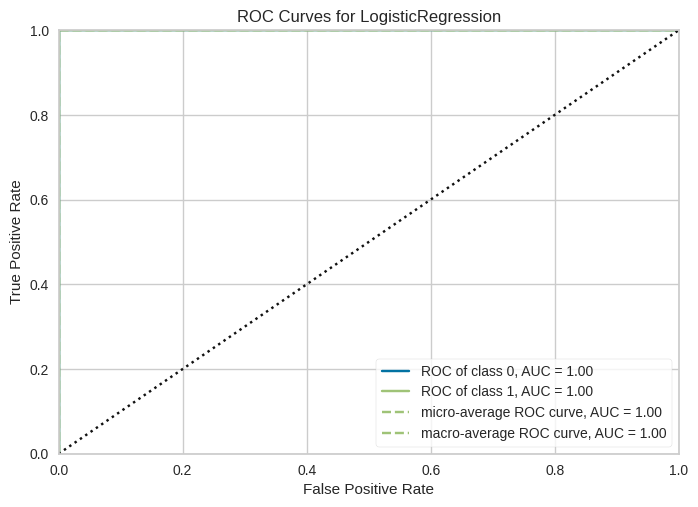

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9206,0.9968,0.7917,1.0000,0.8837,0.8247,0.8377
1,0.9206,0.9882,0.8333,0.9524,0.8889,0.8276,0.8321
2,0.9841,1.0000,1.0000,0.9600,0.9796,0.9666,0.9672
3,0.9839,1.0000,0.9565,1.0000,0.9778,0.9651,0.9657
4,0.9355,0.9956,0.8333,1.0000,0.9091,0.8597,0.8683
5,0.9032,0.9923,0.7500,1.0000,0.8571,0.7862,0.8048
6,0.9516,0.9967,0.9167,0.9565,0.9362,0.8972,0.8978
7,0.9516,0.9989,0.8750,1.0000,0.9333,0.8956,0.9005
8,0.9355,0.9967,0.8750,0.9545,0.9130,0.8619,0.8640


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

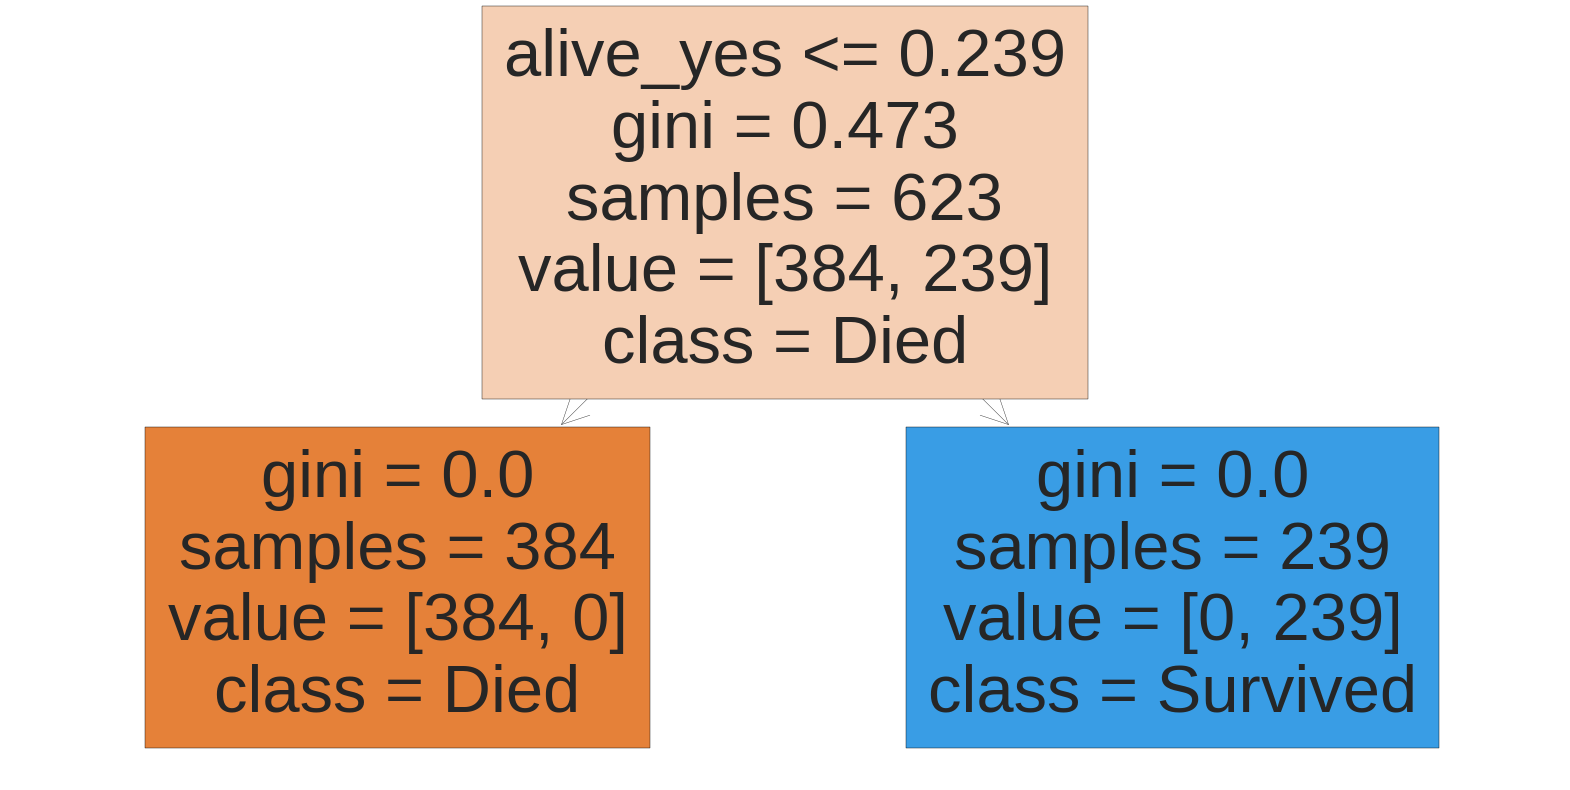

Model training, evaluation, and visualization completed.
No charts were generated by quickchart


In [1]:
# 導入必要的套件
!pip install pycaret

# Import required libraries
import pandas as pd
import seaborn as sns
from pycaret.classification import *
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Load Titanic dataset
def load_data():
    # Load dataset from seaborn or local file
    data = sns.load_dataset('titanic')
    return data

# Step 2: Preprocess the Titanic dataset
def preprocess_data(data):
    data = data.copy()

    # Handle missing values
    data['age'].fillna(data['age'].median(), inplace=True)
    data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

    # Convert 'deck' to a string type before filling
    data['deck'] = data['deck'].astype(str)
    data['deck'].fillna('Unknown', inplace=True)

    # Ensure target column 'survived' is numeric
    data['survived'] = data['survived'].astype(int)

    # Encode categorical variables
    data = pd.get_dummies(data, columns=['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive', 'alone'], drop_first=True)

    # Drop unnecessary columns if they exist
    columns_to_drop = ['name', 'ticket', 'cabin']
    data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

    return data

# Step 3: Compare and select the best model
def compare_and_select_model(data):
    # Setup PyCaret for classification
    clf = setup(
        data=data,
        target='survived',
        verbose=False,
        session_id=123,
        normalize=True
    )

    # Compare multiple models
    best_model = compare_models()

    return best_model

# Step 4: Tune the best model
def tune_best_model(model):
    tuned_model = tune_model(model)
    return tuned_model

# Step 5: Evaluate the tuned model
def evaluate_and_visualize_model(model):
    # Evaluate model using PyCaret's visualization tools
    evaluate_model(model)

    # Plot additional visualizations
    plot_model(model, plot='confusion_matrix')
    plot_model(model, plot='auc')

# Step 6: Train and visualize Decision Tree specifically
def train_and_plot_decision_tree(data):
    clf = setup(
        data=data,
        target='survived',
        verbose=False,
        session_id=123,
        normalize=True
    )

    # Train a Decision Tree model
    dt_model = create_model('dt')

    # Extract scikit-learn model and plot the tree manually
    dt_estimator = dt_model.named_steps['trained_model'] if hasattr(dt_model, 'named_steps') else dt_model
    if isinstance(dt_estimator, DecisionTreeClassifier):
        plt.figure(figsize=(20, 10))
        plot_tree(dt_estimator, filled=True, feature_names=data.drop(columns=['survived']).columns, class_names=['Died', 'Survived'])
        plt.show()
    else:
        print("Decision Tree plot is not supported for this model.")

# Step 7: Apply ensemble methods
def apply_ensemble_methods(model):
    bagged_model = ensemble_model(model, method='Bagging')
    boosted_model = ensemble_model(model, method='Boosting')

    return bagged_model, boosted_model

# Main Function
def main():
    # Load and preprocess the dataset
    data = load_data()
    preprocessed_data = preprocess_data(data)

    # Compare and select the best model
    best_model = compare_and_select_model(preprocessed_data)

    # Tune the best model
    tuned_model = tune_best_model(best_model)

    # Evaluate and visualize the tuned model
    evaluate_and_visualize_model(tuned_model)

    # Apply ensemble methods
    bagged_model, boosted_model = apply_ensemble_methods(tuned_model)

    # Train and plot Decision Tree specifically
    train_and_plot_decision_tree(preprocessed_data)

    print("Model training, evaluation, and visualization completed.")

if __name__ == "__main__":
    main()
